# What are Brain Tumors?

A brain tumor is a mass or growth of abnormal cells in your brain.

Many different types of brain tumors exist. Some brain tumors are noncancerous (benign), and some brain tumors are cancerous (malignant). Brain tumors can begin in your brain (primary brain tumors), or cancer can begin in other parts of your body and spread to your brain as secondary (metastatic) brain tumors.

<div>
<img src="https://www.mayoclinic.org/-/media/kcms/gbs/patient-consumer/images/2014/10/30/15/17/mcdc7_brain_cancer-8col.jpg" alt="brain_tumor_image" style="width: 300px;"/>
</div>

## In this Notebook we speak about 4 types of Brain Tumors

### 1. Glioma

Glioma is a type of tumor that occurs in the brain and spinal cord. Gliomas begin in the gluey supportive cells (glial cells) that surround nerve cells and help them function. Three types of glial cells can produce tumors. A glioma can affect your brain function and be life-threatening depending on its location and rate of growth.
Gliomas are one of the most common types of primary brain tumors.

<div>
    <img src="https://assets.cureus.com/uploads/figure/file/164887/lightbox_0a114f70280b11eb8f411b16d840121c-final-2.png" style="width:600px;"/>
</div>

### 2. Meningioma

A meningioma is a tumor that arises from the meninges — the membranes that surround the brain and spinal cord. Although not technically a brain tumor, it is included in this category because it may compress or squeeze the adjacent brain, nerves and vessels. Meningioma is the most common type of tumor that forms in the head.
Most meningiomas grow very slowly, often over many years without causing symptoms. But sometimes, their effects on nearby brain tissue, nerves or vessels may cause serious disability.

<div>
    <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTjOeFTen8qxZfMRwXKXQlwUN0TWkMPMvzfig&usqp=CAU" style="width:700px;">
</div>

### 3. Pituitary Tumors (Adenoma)

Pituitary tumors are abnormal growths that develop in your pituitary gland. Some pituitary tumors result in too much of the hormones that regulate important functions of your body. Some pituitary tumors can cause your pituitary gland to produce lower levels of hormones. Most pituitary tumors are noncancerous (benign) growths (adenomas). Adenomas remain in your pituitary gland or surrounding tissues and don't spread to other parts of your body.

<div>
    <img src="https://assets.cureus.com/uploads/figure/file/71851/lightbox_0e62470096cb11e989a2d7e4904c7be4-Figure-2a.png" style="width:500px;"/>
</div>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu
from tensorflow.keras.activations import softmax
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.initializers import HeUniform
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

## Preparing the Dataset

### Preparing Training Images

In [3]:
train_data_gen = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.2,
                                    rotation_range=2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    vertical_flip=True)

In [4]:
training_set = train_data_gen.flow_from_directory(directory="../input/brain-tumor-mri-dataset/Training",
                                                  target_size=(192,192),
                                                  class_mode='categorical',
                                                  batch_size=32)

Found 5712 images belonging to 4 classes.


### Preparing Validation Images

In [5]:
validation_data_gen = ImageDataGenerator(rescale=1./255)

In [6]:
validation_set = validation_data_gen.flow_from_directory(directory="../input/brain-tumor-mri-dataset/Testing",
                                                        target_size=(192,192),
                                                        class_mode='categorical',
                                                        batch_size=32)

Found 1311 images belonging to 4 classes.


### How the dataset looks ?

In [7]:
imgs, labels = next(training_set)

In [8]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

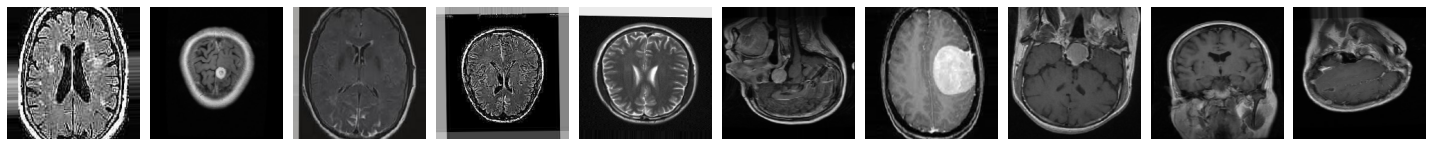

[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]


In [9]:
plotImages(imgs)
print(labels)

## Building a Convolutional Neural Network

In [10]:
model = Sequential()

2022-06-19 07:27:41.032681: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [11]:
model.add(Conv2D(filters=32,
                 kernel_size=3,
                 activation=relu,
                 input_shape=[192, 192, 3]))

In [12]:
model.add(Conv2D(filters=32,
                 kernel_size=3,
                 activation=relu))

In [13]:
# model.add(Conv2D(filters=32,
#                  kernel_size=3,
#                  activation='relu'))

In [14]:
model.add(MaxPool2D(pool_size=2,
                    strides=2,
                    padding='valid'))

In [15]:
model.add(Conv2D(filters=64,
                 kernel_size=3,
                 activation=relu))

In [16]:
# model.add(Conv2D(filters=64,
#                  kernel_size=3,
#                  activation=relu))

In [17]:
model.add(MaxPool2D(pool_size=2,
                    strides=2,
                    padding='valid'))

In [18]:
model.add(Flatten())

In [19]:
model.add(Dense(units=64,
                activation=relu,
                use_bias=True,
                kernel_initializer=HeNormal()))

In [20]:
model.add(Dropout(0.4))

In [21]:
model.add(Dense(units=64,
                activation=relu,
                use_bias=True,
                kernel_initializer=HeUniform()))

In [22]:
model.add(Dense(units=4,
                activation=softmax))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 190, 190, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 188, 188, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 94, 94, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 92, 92, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 46, 46, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 135424)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                8

In [24]:
model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
# early_stopper = EarlyStopping(
#     monitor='val_loss',
#     min_delta=0,
#     patience=0,
#     verbose=0,
#     mode='auto',
#     baseline=None,
#     restore_best_weights=False
# )

In [26]:
model_history = model.fit(x=training_set,validation_data=validation_set,epochs=5,verbose=1,use_multiprocessing=True)

2022-06-19 07:27:42.568260: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
179/179 [==============================] - 286s 2s/step - loss: 1.0612 - accuracy: 0.5103 - val_loss: 1.3037 - val_accuracy: 0.5011
Epoch 2/5
179/179 [==============================] - 282s 2s/step - loss: 0.7869 - accuracy: 0.6619 - val_loss: 0.6638 - val_accuracy: 0.7178
Epoch 3/5
179/179 [==============================] - 278s 2s/step - loss: 0.6922 - accuracy: 0.7127 - val_loss: 0.5950 - val_accuracy: 0.7582
Epoch 4/5
179/179 [==============================] - 275s 2s/step - loss: 0.6411 - accuracy: 0.7398 - val_loss: 0.6767 - val_accuracy: 0.7307
Epoch 5/5
179/179 [==============================] - 286s 2s/step - loss: 0.5907 - accuracy: 0.7579 - val_loss: 0.5998 - val_accuracy: 0.7590


In [27]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [28]:
model.get_weights()

[array([[[[ 1.22221611e-01,  4.37749643e-03, -8.77560824e-02,
           -6.55233115e-02, -3.84738785e-04, -1.10367328e-01,
           -5.79531305e-04, -1.41821012e-01, -5.10939173e-02,
            9.22920108e-02,  1.00838311e-01,  2.27108244e-02,
           -1.27856493e-01, -2.46514585e-02,  1.19233073e-03,
            4.48900126e-02,  1.06723770e-01, -6.09922297e-02,
           -1.22240046e-04,  1.38785005e-01, -1.02777764e-01,
            1.04656719e-01, -1.12994313e-01,  4.72289771e-02,
           -3.76838967e-02, -7.46815056e-02, -8.65338594e-02,
            1.24638453e-01, -1.48644401e-02, -1.14311166e-01,
           -6.78478181e-02, -2.29650121e-02],
          [-3.51018310e-02,  1.15292571e-01,  7.58133084e-02,
            2.42819008e-03,  3.84494178e-02,  9.29046720e-02,
           -6.72764182e-02,  8.35169330e-02,  4.14559208e-02,
           -3.77152227e-02,  1.06553055e-01,  4.01914865e-02,
            6.41088784e-02,  8.11987892e-02, -9.55666527e-02,
           -7.99635723e-

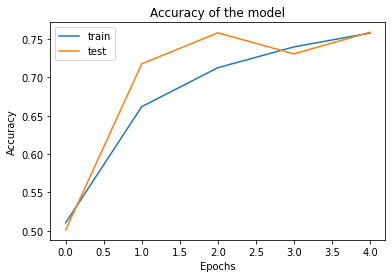

In [29]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Accuracy of the model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

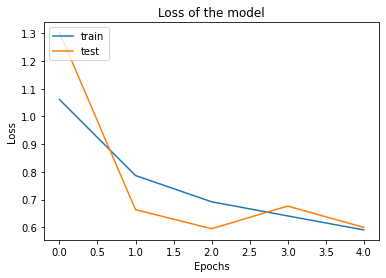

In [30]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Loss of the model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train','test'],loc='upper left')
plt.show()